In [19]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [10]:
parent_dir = '/Users/allybaldelli/Desktop/exo-comets/ProjectExoComet/'
df = pd.read_pickle(parent_dir+'data_file/'+'master_df_final.pkl')  

In [11]:
# Drop the columns
try:
    df = df.drop(columns=['MJD-Obs', 'Date-Obs'])

except KeyError as e:
    print(f"columns already dropped")

In [20]:
n_componets = 2

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=n_componets)  # Number of components to keep
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=["PC"+str(i) for i in range(1, n_componets+1)])


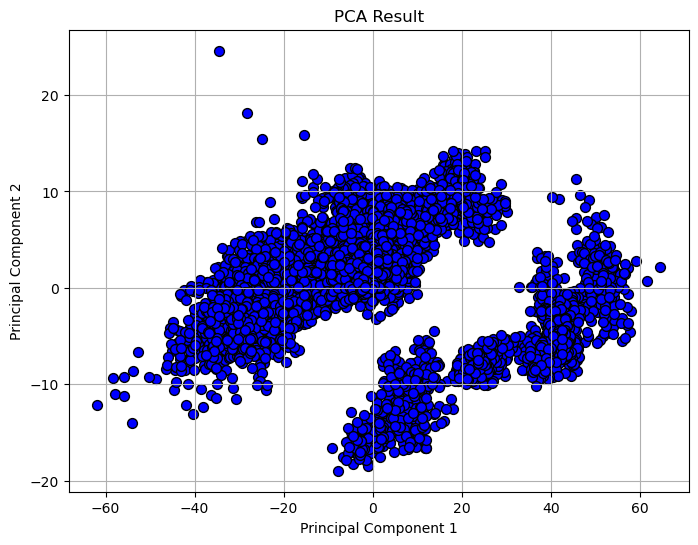

In [13]:
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid()
plt.show()

In [21]:
# Estimate the original data using the two components
estimated_original_data = pca.inverse_transform(principal_components)

# Convert the estimated data back to a DataFrame
estimated_df = pd.DataFrame(estimated_original_data, columns=df.columns)

# Unscale the data
unscaled_data = pd.DataFrame(scaler.inverse_transform(scaled_data), columns=df.columns)
unscaled_estimated_data = pd.DataFrame(scaler.inverse_transform(estimated_original_data), columns=df.columns)

difference_df = pd.DataFrame(unscaled_data - unscaled_estimated_data, columns=df.columns)

6676it [00:22, 293.38it/s]


Text(0.5, 1.0, 'Difference')

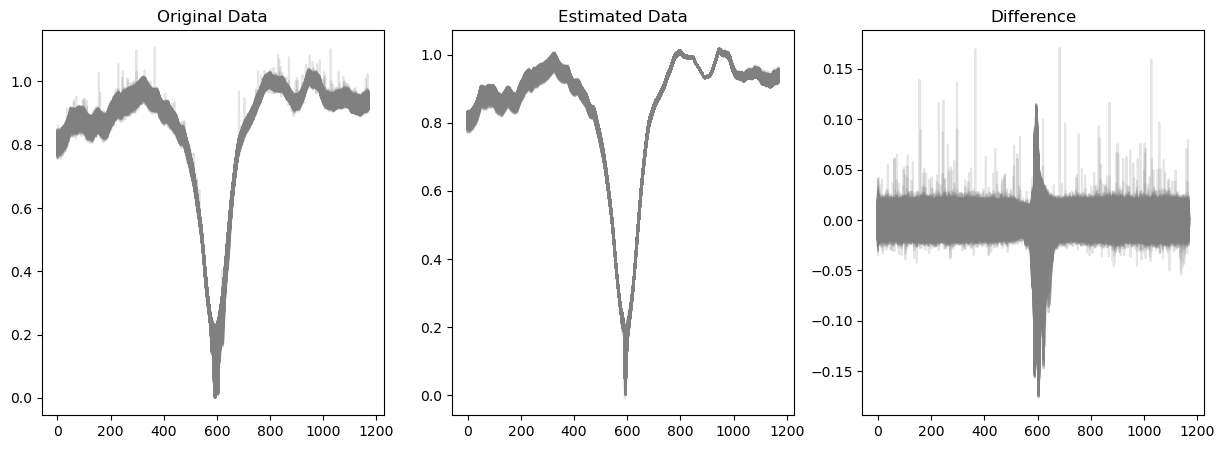

In [23]:
# Plot each row as a separate line

df_reset = df.reset_index(drop=True)
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
plt.title('Original Data')
for index, row in tqdm(unscaled_data.iterrows()):
    ax1.plot(row, color='gray', alpha=0.2)
    ax2.plot(unscaled_estimated_data.loc[index], color='gray', alpha=0.2)
    ax3.plot(difference_df.loc[index], color='grey', alpha=0.2)
ax1.set_title('Original Data')
ax2.set_title('Estimated Data')
ax3.set_title('Difference')

